## This notebook relates to ticket https://noirlab.atlassian.net/browse/GOATS-481

In [1]:
## folowing imports copied from https://github.com/TOMToolkit/tom_base/blob/dev/tom_dataproducts/processors/spectroscopy_processor.py 
import mimetypes
import numpy as np

from datetime import datetime

from astropy import units
from astropy.io import fits, ascii as astropy_ascii
from astropy.time import Time
from astropy.wcs import WCS
from specutils import Spectrum1D

# from tom_dataproducts.data_processor import DataProcessor
# from tom_dataproducts.exceptions import InvalidFileFormatException
# from tom_dataproducts.processors.data_serializers import SpectrumSerializer
#from tom_observations.facility import get_service_class, get_service_classes

In [2]:
# import other libraries
import astrodata
import gemini_instruments
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

### Let's open a DRAGONS reduced 1D spectrum from GMOS

In [6]:
ad = astrodata.open("../../goats_data/ZTF18aaaritk/GEM/GS-2021A-DD-102-9/run-20241003010205/S20210219S0075_1D.fits")

In [7]:
flux, header = fits.getdata("../../goats_data/ZTF18aaaritk/GEM/GS-2021A-DD-102-9/run-20241003010205/S20210219S0075_1D.fits", header=True)

In [8]:
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 3200                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    F / inherit the primary header                     
DATATYPE= 'Intensity'          / Type of Data                                   
EQUINOX =                2000. / Equinox of coordinate system                   
MJD-OBS =     59264.3438821785 / MJD of start of obseration                     
CCDNAME = 'BI5-36-4k-2,BI11-33-4k-1,BI12-34-4k-1' / CCD chip name(s)            
GAIN    =                  1.0 / Gain [electrons/data value]                    
RDNOISE =                 4.

In [9]:
flux

array([ 0.00000000e+00, -5.14769974e-10,  2.68357433e-10, ...,
        1.82725993e-19,  1.49662875e-19,  0.00000000e+00], dtype='>f8')

In [10]:
flux.shape

(3200,)

In [13]:
wcs = WCS(header=header, naxis=1)
## flux unit
flux_unit = header['BUNIT']
flux_unit

'W m-2 nm-1'

In [18]:
## convert the flux_unit into astropy unit, required for creating Spectrum1D object
flux_unit_astropy = u.Unit(flux_unit) # plays the role of flux_constant in https://github.com/TOMToolkit/tom_base/blob/af15325e5f9a9af6f60194387323384ad1b33f25/tom_dataproducts/processors/spectroscopy_processor.py#L84
flux_unit_astropy, type(flux_unit_astropy)

(Unit("W / (nm m2)"), astropy.units.core.CompositeUnit)

In [36]:
spectrum = Spectrum1D(flux=flux*flux_unit_astropy, wcs=wcs) ## with the wcs inout, the wavelength unit will be automatically  

In [37]:
spectrum 

<Spectrum1D(flux=<Quantity [ 0.00000000e+00, -5.14769974e-10,  2.68357433e-10, ...,
            1.82725993e-19,  1.49662875e-19,  0.00000000e+00] W / (nm m2)>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [4.19417288e-07, 4.19566600e-07, 4.19715912e-07, ..., 8.96768882e-07,
   8.96918194e-07, 8.97067506e-07] m>)>

In [39]:
print (spectrum.spectral_axis) # wavelength with unit  
print (spectrum.spectral_axis.value) # wavelength without unit
print (spectrum.flux) # flux with unit 
print (spectrum.flux.value) # flux without unit

[4.19417288e-07 4.19566600e-07 4.19715912e-07 ... 8.96768882e-07
 8.96918194e-07 8.97067506e-07] m
[4.19417288e-07 4.19566600e-07 4.19715912e-07 ... 8.96768882e-07
 8.96918194e-07 8.97067506e-07]
[ 0.00000000e+00 -5.14769974e-10  2.68357433e-10 ...  1.82725993e-19
  1.49662875e-19  0.00000000e+00] W / (nm m2)
[ 0.00000000e+00 -5.14769974e-10  2.68357433e-10 ...  1.82725993e-19
  1.49662875e-19  0.00000000e+00]


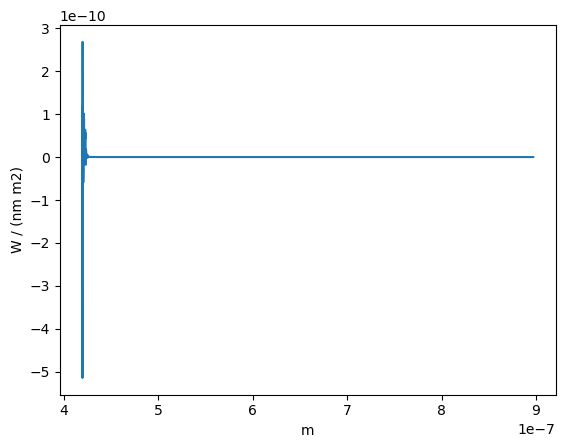

In [40]:
## Let's plot it with mapltolib

plt.close('all')
fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux)
ax.set_xlabel(f'{spectrum.spectral_axis.unit}')

ax.set_ylabel(f'{spectrum.flux.unit}')
plt.show()